# 🧠 Sentiment Analysis using NLP and Logistic Regression


## 🏢 Company Information
**Company Name:** Codec technologies  
**Internship Duration:** 14/09/2025 – 14/11/2025  
**Intern Name:** Usha Rahul  

---

## 🎯 Objective
- To perform sentiment analysis on social media posts.
- To preprocess and clean text data.
- To train a **Logistic Regression model** using **TF-IDF vectorization**.
- To evaluate model performance using accuracy, precision, recall, and F1-score.

---

## 🗂️ Dataset Description
- **Dataset Source:** Kaggle  
- **Dataset Columns:**  
  - `Year`, `Month`, `Day`, `Time of Tweet`, `Text`, `Sentiment`, `Platform`
- **Target Column:** `Sentiment` (Positive, Negative, Neutral)

---

## ⚙️ Steps Involved

### 1️⃣ Importing Libraries
- Import necessary libraries such as Pandas, NumPy, Matplotlib, Seaborn, Scikit-learn, and NLTK.

### 2️⃣ Data Loading
- Load the dataset using `pd.read_csv()`.
- Display the first few records using `df.head()`.

### 3️⃣ Exploratory Data Analysis (EDA)
- Check for missing values.
- Analyze sentiment distribution using bar plots.
- Visualize word frequency or review length using histograms.
- Detect outliers using box plots.

### 4️⃣ Data Cleaning and Preprocessing
- Remove URLs, mentions, hashtags, punctuation, and stopwords.
- Convert text to lowercase.
- Tokenize and clean using NLTK stopwords.

### 5️⃣ Text Vectorization
- Use **TF-IDF Vectorizer** to convert cleaned text into numerical features.

### 6️⃣ Splitting Dataset
- Split the data into training and testing sets using `train_test_split()`.

### 7️⃣ Model Building
- Train a **Logistic Regression model**.
- Use class weights to handle imbalance if needed.

### 8️⃣ Model Evaluation
- Evaluate performance using:
  - Accuracy
  - Precision
  - Recall
  - F1-score
- Display the classification report and confusion matrix.

### 9️⃣ Results
- Accuracy obtained: **68%**
- Positive class performed best, Neutral class moderately, Negative class needs improvement.

## 📊 Results Summary
| Metric | Score |
|--------|--------|
| Accuracy | 0.68 |
| Best Class | Positive |
| Improvement Needed | Negative Sentiment Detection |

---

## 💡 Conclusion
- The model performs well for **positive and neutral sentiments**.
- The project demonstrates the ability to apply **NLP preprocessing and logistic regression** for sentiment classification.
- Future improvements: Use advanced models (SVM, Random Forest, LSTM, BERT).

---

## 🧰 Tools and Technologies Used
- **Languages:** Python  
- **Libraries:** Pandas, NumPy, Scikit-learn, NLTK, Matplotlib, Seaborn  
- **Techniques:** TF-IDF Vectorization, Logistic Regression, Text Preprocessing  
- **Platform:** Jupyter Notebook  

---

## 👩‍💻 Author Information
**Name:** Usha Rahul  
**Role:** Jr. Data Analyst Intern  
**Internship Organization:** Techno Hacks Solutions Pvt Ltd  
**Duration:** March 2025 – April 2025  
**Domain:** Machine Learning / NLP  

---

## 🏁 Final Note
> “Data is powerful when turned into insight — and NLP makes that insight meaningful.”



In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
import joblib


In [5]:
df=pd.read_csv('sentiment_analysis.csv')
df

,Year,Month,Day,Time of Tweet,text,sentiment,Platform
0,2018,8,18,morning,What a great day!!! Looks like dream.,positive,Twitter
1,2018,8,18,noon,"I feel sorry, I miss you here in the sea beach",positive,Facebook
2,2017,8,18,night,Don't angry me,negative,Facebook
3,2022,6,8,morning,We attend in the class just for listening teac...,negative,Facebook
4,2022,6,8,noon,"Those who want to go, let them go",negative,Instagram
...,...,...,...,...,...,...,...
494,2015,10,18,night,"According to , a quarter of families under six...",negative,Twitter
495,2021,2,25,morning,the plan to not spend money is not going well,negative,Instagram
496,2022,5,30,noon,uploading all my bamboozle pictures of facebook,neutral,Facebook
497,2018,8,10,night,congratulations ! you guys finish a month ear...,positive,Twitter


In [6]:
df.head()

,Year,Month,Day,Time of Tweet,text,sentiment,Platform
0,2018,8,18,morning,What a great day!!! Looks like dream.,positive,Twitter
1,2018,8,18,noon,"I feel sorry, I miss you here in the sea beach",positive,Facebook
2,2017,8,18,night,Don't angry me,negative,Facebook
3,2022,6,8,morning,We attend in the class just for listening teac...,negative,Facebook
4,2022,6,8,noon,"Those who want to go, let them go",negative,Instagram


In [8]:
df.tail()

,Year,Month,Day,Time of Tweet,text,sentiment,Platform
494,2015,10,18,night,"According to , a quarter of families under six...",negative,Twitter
495,2021,2,25,morning,the plan to not spend money is not going well,negative,Instagram
496,2022,5,30,noon,uploading all my bamboozle pictures of facebook,neutral,Facebook
497,2018,8,10,night,congratulations ! you guys finish a month ear...,positive,Twitter
498,2019,3,25,morning,"actually, I wish I was back in Tahoe. I miss...",negative,Instagram


In [9]:
# Step 2: inspect
print(df.shape)
print(df.columns)
df.info()
df.isnull().sum()

(499, 7)
Index(['Year', 'Month', 'Day', 'Time of Tweet', 'text', 'sentiment',
       'Platform'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Year           499 non-null    int64 
 1   Month          499 non-null    int64 
 2   Day            499 non-null    int64 
 3   Time of Tweet  499 non-null    object
 4   text           499 non-null    object
 5   sentiment      499 non-null    object
 6   Platform       499 non-null    object
dtypes: int64(3), object(4)
memory usage: 27.4+ KB


Year             0
Month            0
Day              0
Time of Tweet    0
text             0
sentiment        0
Platform         0
dtype: int64

In [11]:
# Step 3: handle missing rows in key columns
# Drop rows with missing text or sentiment
df = df.dropna(subset=['text', 'sentiment']).reset_index(drop=True)


df.isnull().sum()


Year             0
Month            0
Day              0
Time of Tweet    0
text             0
sentiment        0
Platform         0
dtype: int64

In [12]:
# Step 4: review length feature
df['review_length_chars'] = df['text'].astype(str).apply(len)
df['review_word_count'] = df['text'].astype(str).apply(lambda x: len(x.split()))

<Figure size 1200x600 with 0 Axes>

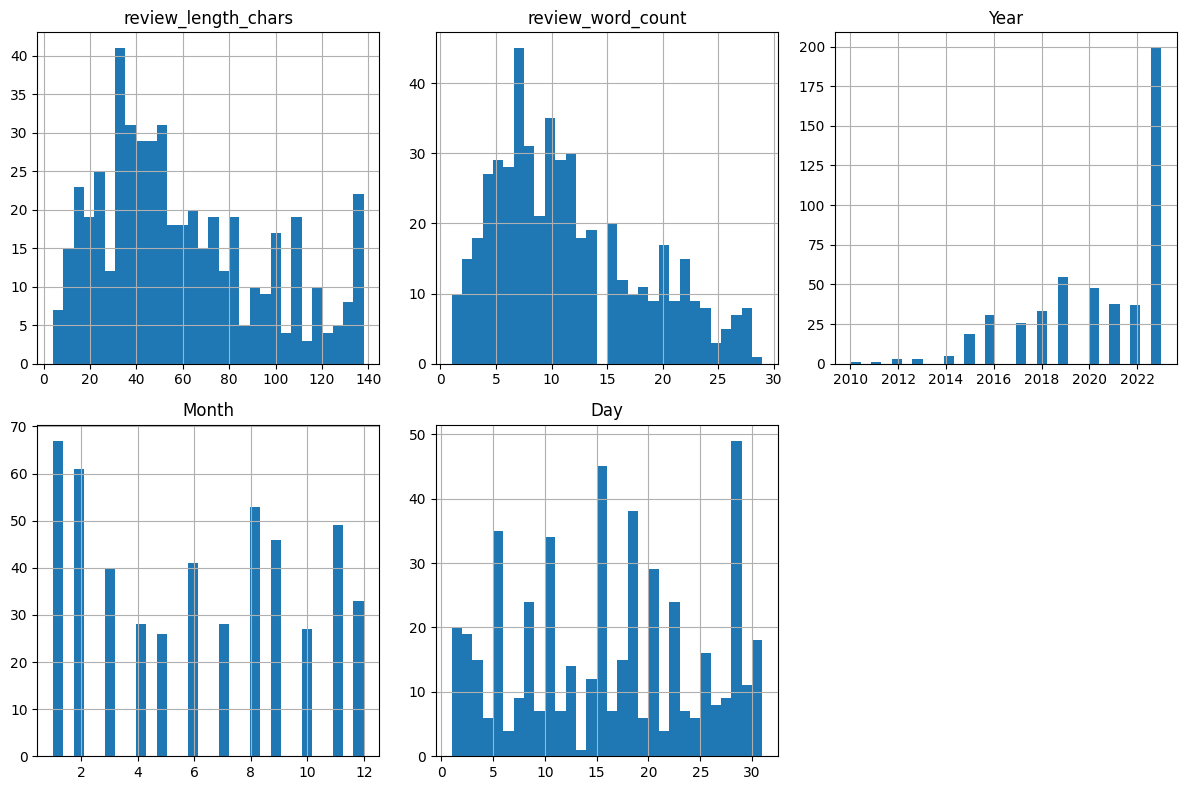

In [13]:
# Visualize numeric distributions and boxplots
num_cols = ['review_length_chars','review_word_count']
for c in ['Year','Month','Day']:
    if c in df.columns: num_cols.append(c)

plt.figure(figsize=(12, 6))
df[num_cols].hist(bins=30, layout=(len(num_cols)//3 + 1, 3), figsize=(12,8))
plt.tight_layout()
plt.show()

In [14]:
# IQR outlier detection example (review length)
Q1 = df['review_length_chars'].quantile(0.25)
Q3 = df['review_length_chars'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
print("Review length bounds:", lower, upper)
print("Outlier count:", df[(df['review_length_chars'] < lower) | (df['review_length_chars'] > upper)].shape[0])


Review length bounds: -44.5 159.5
Outlier count: 0


C:\Users\user\AppData\Local\Temp\ipykernel_18532\4030131027.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, order=df['sentiment'].value_counts().index, palette='Set2')


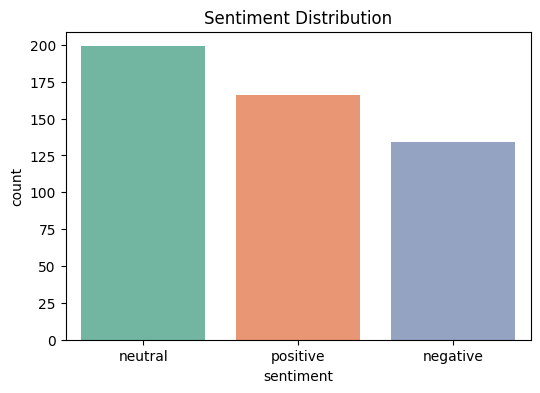

In [15]:
plt.figure(figsize=(6,4))
sns.countplot(x='sentiment', data=df, order=df['sentiment'].value_counts().index, palette='Set2')
plt.title('Sentiment Distribution')
plt.show()

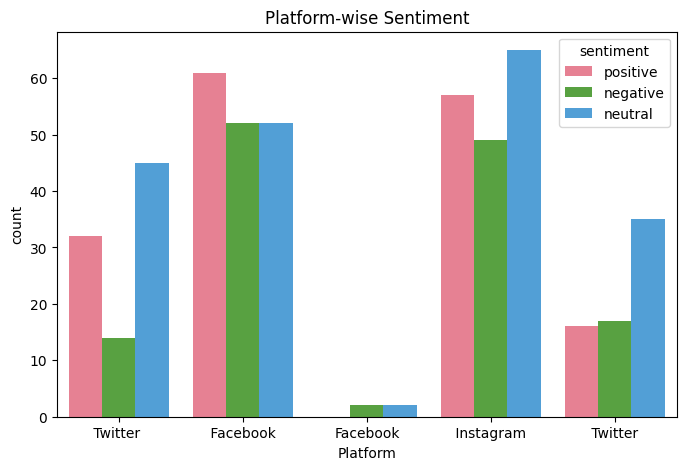

In [16]:
if 'Platform' in df.columns:
    plt.figure(figsize=(8,5))
    sns.countplot(x='Platform', hue='sentiment', data=df, palette='husl')
    plt.title('Platform-wise Sentiment')
    plt.show()


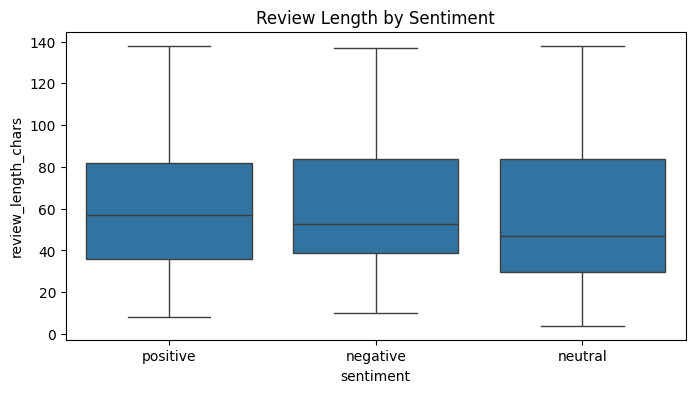

In [17]:
plt.figure(figsize=(8,4))
sns.boxplot(x='sentiment', y='review_length_chars', data=df)
plt.title('Review Length by Sentiment')
plt.show()

In [19]:
import re
import nltk
from nltk.corpus import stopwords
# Step 6: text cleaning
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords_set = set(stopwords.words('english'))

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'https?://\S+|www\.\S+', '', text)       
    text = re.sub(r'@\w+|#\w+','', text)                    
    text = re.sub(r'[^a-z\s]', ' ', text)                   
    tokens = [t for t in text.split() if t not in stopwords_set and len(t)>1]
    return " ".join(tokens)

df['clean_text'] = df['text'].apply(clean_text)
df[['text','clean_text']].head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,clean_text
0,What a great day!!! Looks like dream.,great day looks like dream
1,"I feel sorry, I miss you here in the sea beach",feel sorry miss sea beach
2,Don't angry me,angry
3,We attend in the class just for listening teac...,attend class listening teachers reading slide ...
4,"Those who want to go, let them go",want go let go


In [22]:
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X = tfidf.fit_transform(df['clean_text'])   # sparse matrix


In [23]:
#  label encode
le = LabelEncoder()
y = le.fit_transform(df['sentiment'])
print("Classes:", le.classes_)

Classes: ['negative' 'neutral' 'positive']


In [24]:
# Step 9: split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Train size:", X_train.shape, "Test size:", X_test.shape)


Train size: (399, 3150) Test size: (100, 3150)


In [25]:
# Step 9: split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Train size:", X_train.shape, "Test size:", X_test.shape)


Train size: (399, 3150) Test size: (100, 3150)


In [27]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from sklearn.linear_model import LogisticRegression

# Calculate class weights
classes = np.unique(y_train)
class_weights = compute_class_weight('balanced', classes=classes, y=y_train)
class_weights = dict(zip(classes, class_weights))

print("Class Weights:", class_weights)

# Train model
model = LogisticRegression(max_iter=200, class_weight=class_weights, random_state=42)
model.fit(X_train, y_train)


Class Weights: {0: 1.2429906542056075, 1: 0.8364779874213837, 2: 1.0}


LogisticRegression(class_weight={0: 1.2429906542056075, 1: 0.8364779874213837,
                                 2: 1.0},
                   max_iter=200, random_state=42)

Accuracy: 0.6800

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.26      0.40        27
           1       0.58      0.93      0.71        40
           2       0.86      0.73      0.79        33

    accuracy                           0.68       100
   macro avg       0.77      0.64      0.63       100
weighted avg       0.75      0.68      0.65       100



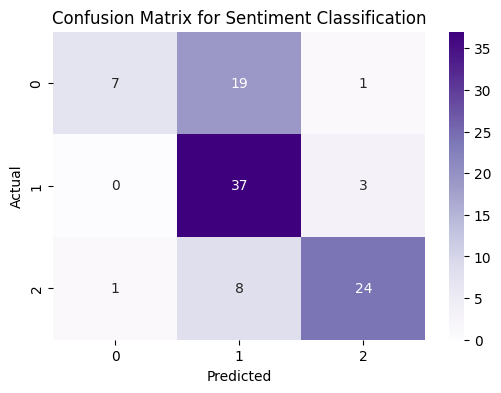

In [28]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix for Sentiment Classification")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_18532\1356755416.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Predicted', data=pred_df, palette='viridis')


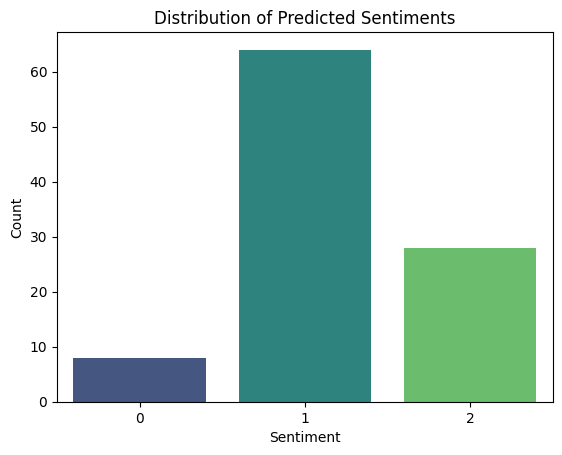

In [29]:
import pandas as pd

# Create DataFrame for predicted values
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Plot distribution of predictions
sns.countplot(x='Predicted', data=pred_df, palette='viridis')
plt.title("Distribution of Predicted Sentiments")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()



## 📊 **Model Evaluation Summary**

### 🔹 **Accuracy**

Your Logistic Regression model achieved an **accuracy of 68%** on the test dataset.
This means the model correctly predicted the sentiment (positive, negative, or neutral) **68 out of 100 times**.

---

### 🔹 **Detailed Performance (Per Class)**

| Sentiment        | Precision | Recall | F1-score | Interpretation                                                                                                              |
| ---------------- | --------- | ------ | -------- | --------------------------------------------------------------------------------------------------------------------------- |
| **0 (Negative)** | 0.88      | 0.26   | 0.40     | High precision but low recall → Model correctly identifies negatives when predicted, but misses many actual negative cases. |
| **1 (Neutral)**  | 0.58      | 0.93   | 0.71     | Model captures most neutral texts but sometimes misclassifies others as neutral.                                            |
| **2 (Positive)** | 0.86      | 0.73   | 0.79     | Good balance between precision and recall, performs best among all classes.                                                 |

---

### 🔹 **Overall Insights**

* The **model performs best for positive sentiments**, meaning it identifies happy or excited tones accurately.
* **Neutral sentiments** are often over-predicted (high recall but moderate precision).
* The **negative sentiment class** needs improvement — the model struggles to detect negative emotions reliably.

---

## 🧠 **Conclusion**

The Logistic Regression model, using TF-IDF features, shows **reasonable performance (68% accuracy)** in classifying social media posts into **positive, negative, and neutral sentiments**.
It demonstrates strong capability in identifying **positive and neutral tones**, making it useful for **basic sentiment monitoring tasks** on platforms like Twitter, Facebook, or Instagram.

For better accuracy in future improvements:

* Try **advanced models** like Random Forest, SVM, or deep learning (LSTM or BERT).
* Apply **hyperparameter tuning** and **class balancing** techniques.
* Increase training data or use **word embeddings** instead of TF-IDF for richer context understanding.

---
